# Intensity vs Fermi Chopper frequency -- Chopper 2

Just try the original parameters

In [1]:
cd ~/dv/sns-chops/resolution/ARCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [3]:
from mcni.utils import conversion as C

In [4]:
%matplotlib notebook

Exp data

In [7]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [8]:
# expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC1_2018.dat'))
expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC2_2018_v2.dat'))

reading data. please wait...
  done


In [9]:
monitor_int_data = np.loadtxt('../V_Cali_MonitorInt_FC2_2018_v2.dat')
runno2monitorint = dict()
for runno, mint in monitor_int_data:
    runno2monitorint[int(runno)] = mint

In [10]:
unique_nominal_Eis = set( list(expdata.Ei_list)) 

In [11]:
# unique_nominal_Eis

In [12]:
Ei = 100.

In [13]:
condition = np.isclose(expdata.vdata.Energy, Ei)

In [14]:
expdata.vdata.RunNumber[condition]

13     108045.0
32     108064.0
69     108101.0
82     108114.0
106    108138.0
119    108151.0
137    108169.0
152    108184.0
174    107983.0
198    108007.0
217    108026.0
Name: RunNumber, dtype: float64

In [15]:
expdata.chopper_freqs[condition]

array([ 180.,  240.,  300.,  360.,  420.,  480.,  540.,  600.,   60.,
         60.,  120.])

In [16]:
mint = np.array([runno2monitorint[rn] for rn in expdata.vdata.RunNumber[condition]])

<IPython.core.display.Javascript object>


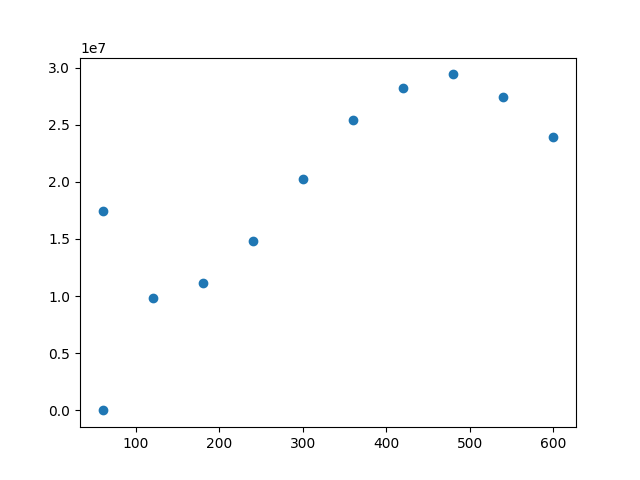

In [17]:
plt.figure()
freqs = expdata.chopper_freqs[condition]
plt.plot(freqs, mint*C.e2v(Ei), 'o')

Resolution planner

In [6]:
import sys
sys.path.insert(0, '/SNS/users/lj7/dv/sns-chops/Resolution_Planner')

In [21]:
import res_ints_4; reload(res_ints_4)

<module 'res_ints_4' from '/SNS/users/lj7/dv/sns-chops/Resolution_Planner/res_ints_4.pyc'>

In [22]:
instrument = res_ints_4.ARCS

In [25]:
# resolution
dw = instrument.domega_in(Ei=100., Ef=100., nu=600)
print dw

2.74523693515


In [28]:
nu = np.array([600.])

In [29]:
instrument.flux(instrument.mod_file, Ei=100., Ef=100., nu=nu)

array([ 67182845.11005086])

In [30]:
def intensity_RP(
    fc_freq,
    Ei = 100.,
):
    return instrument.flux(instrument.mod_file, Ei=Ei, Ef=Ei, nu=fc_freq)

In [41]:
scale = 4e-1

<IPython.core.display.Javascript object>


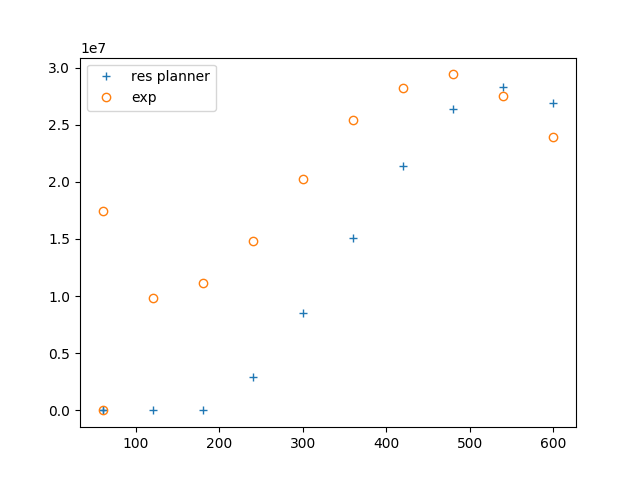

In [42]:
res = intensity_RP(fc_freq=freqs)
plt.figure()
plt.plot(freqs, np.array(res)*scale, '+', label='res planner')
plt.plot(freqs, mint*C.e2v(Ei), 'o', mfc='none', label='exp')
#plt.ylim(3, 6.5)
plt.legend()

# Try plotting more Eis

In [43]:
def getExpXY(Ei):
    "return freq, intensity"
    condition = np.isclose(expdata.vdata.Energy, Ei)
    x = expdata.chopper_freqs[condition]
    y = np.array([runno2monitorint[rn] for rn in expdata.vdata.RunNumber[condition]]) *C.e2v(Ei)
    return x,y

<IPython.core.display.Javascript object>


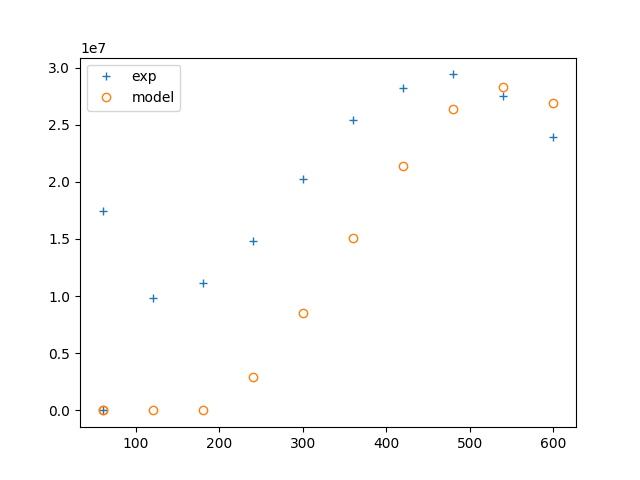

In [45]:
Ei = 100
freqs, expInt = getExpXY(Ei)
modelInt = intensity_RP(freqs)

plt.figure()
plt.plot(freqs, expInt, '+', label='exp')
plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
# plt.ylim(3, 6.5)
plt.legend()

In [37]:
set(expdata.vdata.Energy)

{8.0,
 10.0,
 12.0,
 15.0,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0,
 250.0,
 300.0,
 400.0,
 500.0,
 600.0}

<IPython.core.display.Javascript object>


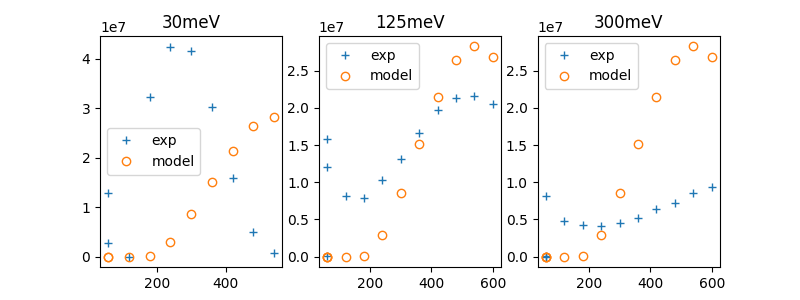

In [47]:
Eilist = [30, 125, 300]
N = len(Eilist)
plt.figure(figsize=(8,3))

for i, Ei in enumerate(Eilist):
    freqs, expInt = getExpXY(Ei)
    modelInt = intensity_RP(freqs)
    plt.subplot(1, N, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expInt, '+', label='exp')
    plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
    plt.legend()

# All energies

In [48]:
unique_nominal_Eis

{8.0,
 10.0,
 12.0,
 15.0,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0,
 250.0,
 300.0,
 400.0,
 500.0,
 600.0}

<IPython.core.display.Javascript object>


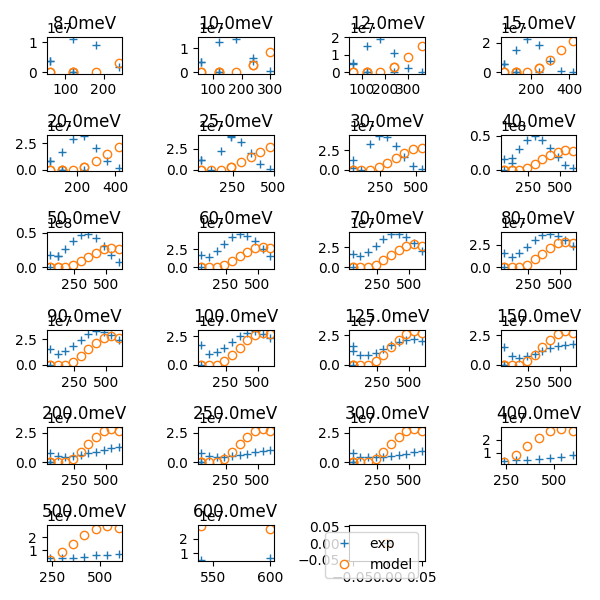

In [50]:
Ei_list = sorted(unique_nominal_Eis)
N = len(Ei_list)
cols = 4
# rows = (N-1)//cols + 1
rows = N//cols + 1
plt.figure(figsize=(6,6))

import warnings
for i, Ei in enumerate(Ei_list):
    freqs, expInt = getExpXY(Ei)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        modelInt = intensity_RP(freqs)

    plt.subplot(rows, cols, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expInt, '+', label='exp')
    plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
plt.subplot(rows, cols, N+1)
plt.plot([0], [0], '+', label='exp')
plt.plot([0], [0], 'o', mfc='none', label='model')
plt.legend()
plt.tight_layout()

# Check pychop impl.

In [49]:
from mcni.utils import conversion as C

In [51]:
C.k2e

<function mcni.utils.conversion.k2e>

In [54]:
instrument.moderator.measured_flux['wavelength']

[0.0285984265,
 0.2335051748,
 0.2859842653,
 0.310193488,
 0.3418165757,
 0.3856211047,
 0.4521808267,
 0.4834016372,
 0.522133444,
 0.5719685306,
 0.6394802577,
 0.6936137254,
 0.7643250991,
 0.8255654628,
 0.9043616533,
 0.9809179374,
 1.0809189212,
 1.2194410046,
 1.4299213265,
 1.5286501982,
 1.6511309256,
 1.8087233066,
 2.0222141331,
 2.3350517482]

In [58]:
C.k2e(300)

186490.96617667977

<IPython.core.display.Javascript object>


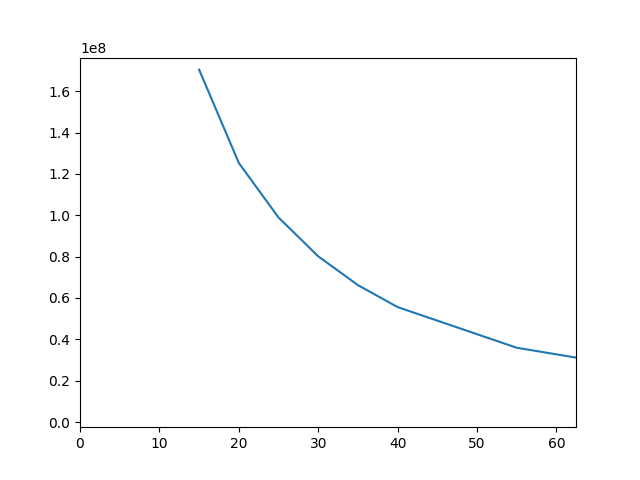

(0, 1000)

In [62]:
wavelen = np.array(instrument.moderator.measured_flux['wavelength'])
plt.figure()
plt.plot(
    C.k2e(2*np.pi/wavelen),
    wavelen* instrument.moderator.measured_flux['flux']
)
plt.xlim(0, 1000)

In [66]:
instrument.moderator.getFlux(20)

array([ 61973584.35755062])

# Try my implementation of flux
This flux is the moderator flux, not the flux on fermi chopper

In [69]:
sys.path.insert(0, '/SNS/users/lj7/dv/sns-chops/snschops/')

In [70]:
from snschops.moderator import arcs_model

<IPython.core.display.Javascript object>


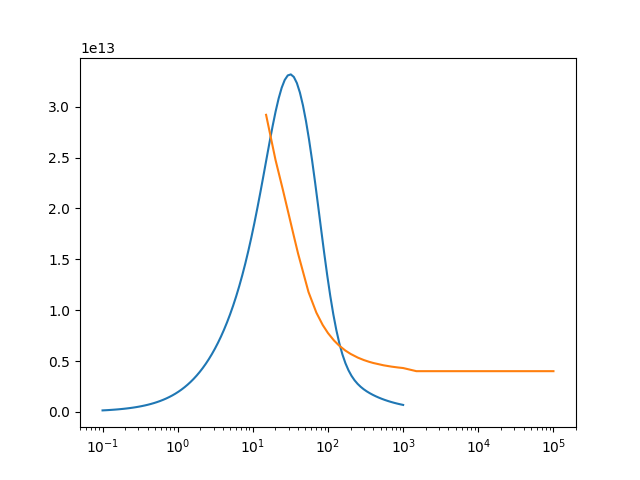

In [99]:
E = np.logspace(-4, 0, 100) # eV

flux = arcs_model.model.I_E(E)

plt.figure()
plt.semilogx(E*1e3, flux)
plt.semilogx(
    C.k2e(2*np.pi/wavelen),
    instrument.moderator.measured_flux['flux']*4e5
)

In [88]:
v=C.e2v(E*1000)

<IPython.core.display.Javascript object>


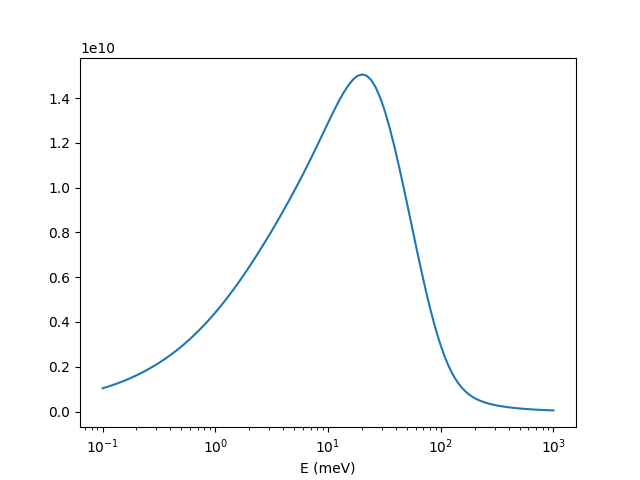

Text(0.5,0,u'E (meV)')

In [92]:
plt.figure()
plt.semilogx(E*1e3, flux/v)
plt.xlabel('E (meV)')

# White beam flux


digitized the I(E) curve of ARCS beam monitor data (Fig. 5 of ARCS paper)

In [105]:
bm_E, bm_I = np.loadtxt('./ARCSBeamMonitor-I_E.csv', delimiter=',').T

<IPython.core.display.Javascript object>


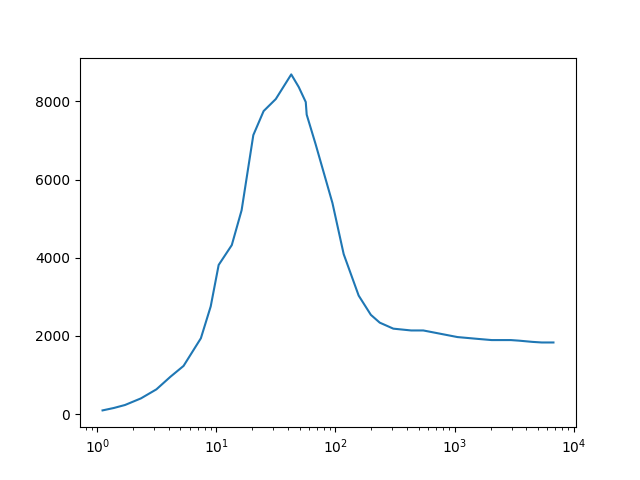

In [107]:
plt.figure()
plt.semilogx(bm_E, bm_I)

This is not flux, but flux / v. let us get flux

<IPython.core.display.Javascript object>


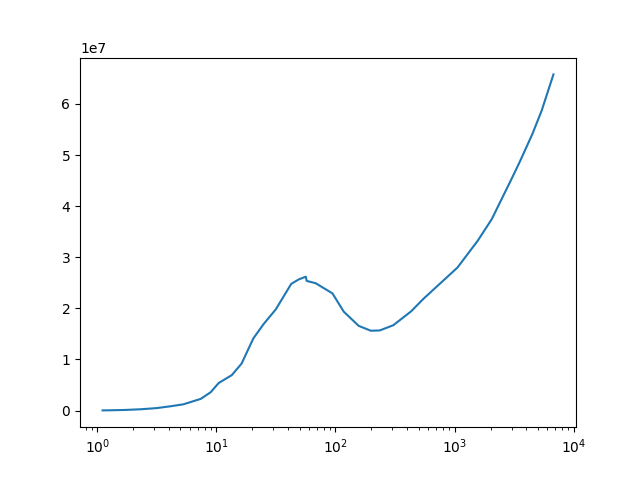

In [108]:
bm_flux = bm_I * C.e2v(bm_E)
plt.figure()
plt.semilogx(bm_E, bm_flux)